In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('xd2vf_anc_sales_Dec2019.csv')
print(df.shape)
df.head(3)

(14011, 28)


,id,date,creation_timestamp,request_from,pnr,first_name,last_name,flight_number,flight_date,is_charter,...,total_price,currency,converted_price,emd_number,form_of_payment,gateway_type,order_id,psp_reference_number,receipt_url,status
0,1,2019-11-30,2019-11-30 22:25:07,web,RQ4BNV,ASTKHIK,OGANESIAN,PS611,2019-12-02,0,...,7.00,EUR,7.00,5.668283e+12,Credit,Adyen,264886483740775,4645751520798127,https://receipts.checkin-gurus.com/production/...,100
1,2,2019-11-30,2019-11-30 22:25:14,web,NHG4MF,DANIELLA,NAFNAF,PS128,2019-12-01,0,...,343.39,UAH,13.15,5.668283e+12,Credit,UKRExim,53663368497151,933500472659,https://receipts.checkin-gurus.com/production/...,100
2,3,2019-11-30,2019-11-30 22:30:07,web,NHUAVQ,CEDRIC,SETROUK,PS128,2019-12-01,0,...,343.39,UAH,13.15,5.668283e+12,Credit,UKRExim,10570873518977,933500472697,https://receipts.checkin-gurus.com/production/...,100


In [4]:
df.columns

Index(['id', 'date', 'creation_timestamp', 'request_from', 'pnr', 'first_name',
       'last_name', 'flight_number', 'flight_date', 'is_charter', 'tkne',
       'customer_id', 'segment_id', 'ssr_type', 'ssr_sub_type', 'quantity',
       'base_price', 'tax', 'total_price', 'currency', 'converted_price',
       'emd_number', 'form_of_payment', 'gateway_type', 'order_id',
       'psp_reference_number', 'receipt_url', 'status'],
      dtype='object')

In [14]:
df.groupby(by=['ssr_sub_type'])['converted_price'].sum()

ssr_sub_type
ABAG      3480.88
APML        55.31
BEML       396.05
BZML        80.80
CBAG      5525.03
CBML       101.26
CDML       192.15
COML       199.89
CRML        70.80
DDML       121.89
FSML       104.90
GLML       265.46
HAML       136.67
HBML       177.84
HCML       111.02
HHML        55.28
HLML        12.06
HSML       313.97
KHML        54.40
KKML       526.80
KMML        34.31
KRML       222.24
LAML        42.18
LDML        33.20
LEML       307.92
LIML       310.98
LMML        54.34
LUML        99.07
MMML        16.23
PCML        20.14
PDBG     25430.77
PQML        81.01
PSML       208.75
PWML        83.83
RQST    130517.46
SCML       130.13
STML        18.11
SVML        54.42
VEML       181.12
VMML       211.02
Name: converted_price, dtype: float64

In [15]:
df.groupby(by=['last_name'])['converted_price'].count().sort_values(ascending=False)

first_name  last_name  
OLEKSANDR   REKHTMAN       7
VLADIMIR    ANDRONACHI     7
ANDRII      DOMANSKYI      6
CATHY ANN   GERLETT        6
VALENTYNA   VELMUSHKINA    6
                          ..
OLEKSANDRA  FEDOROVA       1
            DUBROVINA      1
            BRYHYNETS      1
            BONDARENKO     1
AARNA       PARASHAR       1
Name: converted_price, Length: 11178, dtype: int64

In [18]:
df['name'] = df[['first_name', 'last_name']].agg(' '.join, axis=1)

In [19]:
df.groupby(by='name')['converted_price'].count().sort_values(ascending=False)

name
VLADIMIR ANDRONACHI      7
OLEKSANDR REKHTMAN       7
OLENA BOIKO              6
ANDRII DOMANSKYI         6
VALENTYNA VELMUSHKINA    6
                        ..
OLEKSANDRA FEDOROVA      1
OLEKSANDRA DUBROVINA     1
OLEKSANDRA BRYHYNETS     1
OLEKSANDRA BONDARENKO    1
AARNA PARASHAR           1
Name: converted_price, Length: 11178, dtype: int64

In [28]:
df_rec_sparse = pd.pivot_table(df, index=['name'], columns=['ssr_sub_type'], values=['converted_price'], 
                       aggfunc='count', fill_value=0)

In [29]:
df_rec_sparse

converted_price                                          \
ssr_sub_type                    ABAG APML BEML BZML CBAG CBML CDML COML CRML   
name                                                                           
AARNA PARASHAR                     0    0    0    0    0    0    0    0    0   
AARON WIDMANN                      0    0    0    0    0    0    0    0    0   
ABBAS FAZILATKHOO                  0    0    0    0    0    0    0    0    0   
ABDALLAH MASSRY                    0    0    0    0    0    0    0    0    0   
ABDALLAH SALEH ALI                 0    0    0    0    0    0    0    0    0   
...                              ...  ...  ...  ...  ...  ...  ...  ...  ...   
ZURAB VEPKHVADZE                   0    0    0    0    0    0    0    0    0   
ZURAB ZAKARIADZE                   0    0    0    0    0    0    0    0    0   
ZUZANA BURMAKINOVA                 0    0    0    0    0    0    0    0    0   
ZVIAD JOJUA                        0    0    0    0    0    0    0    0    0   
ZYDRUNAS KARCIAUSKAS               0    0    0    0    0    0    0    0    0   

                           ...                                               \
ssr_sub_type         DDML  ... PDBG PQML PSML PWML RQST SCML STML SVML VEML   
name                       ...                                                
AARNA PARASHAR          0  ...    0    0    0    0    1    0    0    0    0   
AARON WIDMANN           0  ...    0    0    0    0    2    0    0    0    0   
ABBAS FAZILATKHOO       0  ...    0    0    0    0    1    0    0    0    0   
ABDALLAH MASSRY         0  ...    0    0    0    0    1    0    0    0    0   
ABDALLAH SALEH ALI      0  ...    0    0    0    0    1    0    0    0    0   
...                   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
ZURAB VEPKHVADZE        0  ...    1    0    0    0    0    0    0    0    0   
ZURAB ZAKARIADZE        0  ...    0    0    0    0    1    0    0    0    0   
ZUZANA BURMAKINOVA      0  ...    0    0    0    0    1    0    0    0    0   
ZVIAD JOJUA             0  ...    0    0    0    0    2    0    0    0    0   
ZYDRUNAS KARCIAUSKAS    0  ...    0    0    0    0    1    0    0    0    0   

                           
ssr_sub_type         VMML  
name                       
AARNA PARASHAR          0  
AARON WIDMANN           0  
ABBAS FAZILATKHOO       0  
ABDALLAH MASSRY         0  
ABDALLAH SALEH ALI      0  
...                   ...  
ZURAB VEPKHVADZE        0  
ZURAB ZAKARIADZE        0  
ZUZANA BURMAKINOVA      0  
ZVIAD JOJUA             0  
ZYDRUNAS KARCIAUSKAS    0  

[11178 rows x 40 columns]

In [39]:
df_rec = df_rec_sparse.stack().reset_index()


In [37]:
from fastai.collab import *

In [40]:
data = CollabDataBunch.from_df(df_rec, user_name='name', item_name='ssr_sub_type', 
                               rating_name='converted_price', seed=42)

In [41]:
max_count = df_rec['converted_price'].max()

In [43]:
learn = collab_learner(data, n_factors=20, y_range=[0, max_count], wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


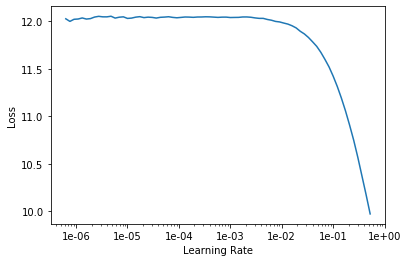

In [44]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [45]:
learn.fit_one_cycle(8, 5e-2)

epoch,train_loss,valid_loss,time
0,0.058019,0.078695,00:17
1,0.071247,0.054570,00:18
2,0.050064,0.052569,00:18
3,0.063935,0.056961,00:18
4,0.058734,0.060306,00:19
5,0.035103,0.034989,00:19
6,0.012426,0.014172,00:19
7,0.012845,0.013822,00:19


In [49]:
u_id, i_id =data.train_ds.x.classes.values()
user_dict = {v:k for k,v in enumerate(u_id)}
prod_dict = {v:k for k,v in enumerate(i_id)}

In [51]:
user = 'ABDALLAH MASSRY'
print('UserId',user)
u_idx = user_dict.get(user, None)
u_idx

UserId ABDALLAH MASSRY


4

In [52]:
%%time
if u_idx is None:
    use_emb = learn.model.u_weight.weight.detach().mean(0)
    use_bias = learn.model.u_bias.weight.detach().mean()
    print('Unknown user')
else:
    use_emb = learn.model.u_weight.weight.detach()[u_idx]
    use_bias = learn.model.u_bias.weight.detach()[u_idx]
    print('User', user)
rating = (torch.matmul(learn.model.i_weight.weight.detach(), use_emb) +
          learn.model.i_bias.weight.detach().reshape(-1) +
          use_bias) 


item_mean_user = pd.DataFrame()
item_mean_user['ssr_sub_type'] = i_id
item_mean_user['converted_price'] = rating.cpu().numpy()

item_mean_user.nlargest(5, 'converted_price')

User ABDALLAH MASSRY
CPU times: user 4.8 ms, sys: 7.91 ms, total: 12.7 ms
Wall time: 299 ms


,ssr_sub_type,converted_price
0,#na#,-0.177289
35,RQST,-1.656202
31,PDBG,-4.659939
5,CBAG,-5.186963
1,ABAG,-7.054221


In [56]:
df_rec_sparse.loc[user].sort_values(ascending=False)

                 ssr_sub_type
converted_price  RQST            1
                 VMML            0
                 DDML            0
                 HLML            0
                 HHML            0
                 HCML            0
                 HBML            0
                 HAML            0
                 GLML            0
                 FSML            0
                 CRML            0
                 KHML            0
                 COML            0
                 CDML            0
                 CBML            0
                 CBAG            0
                 BZML            0
                 BEML            0
                 APML            0
                 HSML            0
                 KKML            0
                 VEML            0
                 PCML            0
                 SVML            0
                 STML            0
                 SCML            0
                 PWML            0
                 PSML    